# Generating x and y values

In [41]:
import numpy as np

x = np.random.randint(-20, 20, 1000)
y = 5 * (x**3) - 8 * (x*x) - 7*x + 1

print(x.shape)
print(y.shape)

(1000,)
(1000,)


# Function for normalizing the values

In [42]:
def normalize(values):
    maximum = np.max(values)
    minimum = np.min(values)

    return (2 * (values - minimum) / (maximum - minimum)) - 1

# Normalizing the values

In [43]:
x_norm = normalize(x)
y_norm = normalize(y)

print(x_norm[:5])
print(y_norm[:5])

[ 0.58974359 -0.33333333 -0.28205128 -0.84615385 -0.38461538]
[ 0.30949498  0.10318293  0.12287782 -0.5613851   0.07740738]


# Creating Test, Validation, Train set

In [44]:
total_size = len(x_norm)
# print(total_size)

test_size = int(total_size * .05)
valid_size = int(total_size * .05)

x_test = x_norm[:test_size]
y_test = y_norm[:test_size]

x_valid = x_norm[test_size:test_size+valid_size]
y_valid = y_norm[test_size:test_size+valid_size]

x_train = x_norm[test_size+valid_size:]
y_train = y_norm[test_size+valid_size:]

print(f'Train Shape: {x_train.shape}')
print(f'Validation Shape: {x_valid.shape}')
print(f'Test Shape: {x_test.shape}')

Train Shape: (900,)
Validation Shape: (50,)
Test Shape: (50,)


# Creating a cnn model

In [45]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inp = Input((1,))

x = Dense(32, activation = 'relu')(inp)
x = Dense(64, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)

outp = Dense(1, name = 'Output_Layer')(x)

model = Model(inputs = inp, outputs=outp, name = 'Regression_DNN_Model')

model.summary()



Model: "Regression_DNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras.metrics import R2Score

model.compile(optimizer = 'adam', loss='mean_squared_error', metrics=[R2Score(name='accuracy')])

In [47]:
model_history = model.fit(x_train, y_train, epochs=10, validation_data = (x_valid, y_valid))

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2904 - loss: 0.1369 - val_accuracy: 0.7124 - val_loss: 0.0249
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8590 - loss: 0.0223 - val_accuracy: 0.8544 - val_loss: 0.0123
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9352 - loss: 0.0120 - val_accuracy: 0.9349 - val_loss: 0.0054
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9678 - loss: 0.0057 - val_accuracy: 0.9652 - val_loss: 0.0029
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0035 - val_accuracy: 0.9829 - val_loss: 0.0014
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0018 - val_accuracy: 0.9894 - val_loss: 9.1678e-04
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9943 - loss: 8.7628e-04 - val_accuracy: 0.9922 - val_loss: 6.3741e-04
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9966 - loss: 6.2309e-04 - val_accuracy: 0

In [48]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Accuracy = {accuracy} and Loss = {loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9980 - loss: 3.5198e-04 
Accuracy = 0.997905433177948 and Loss = 0.0003553854185156524


In [59]:
train_loss = model_history.history['loss']
train_acc = model_history.history['accuracy']

valid_loss = model_history.history['val_loss']
vaild_acc = model_history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

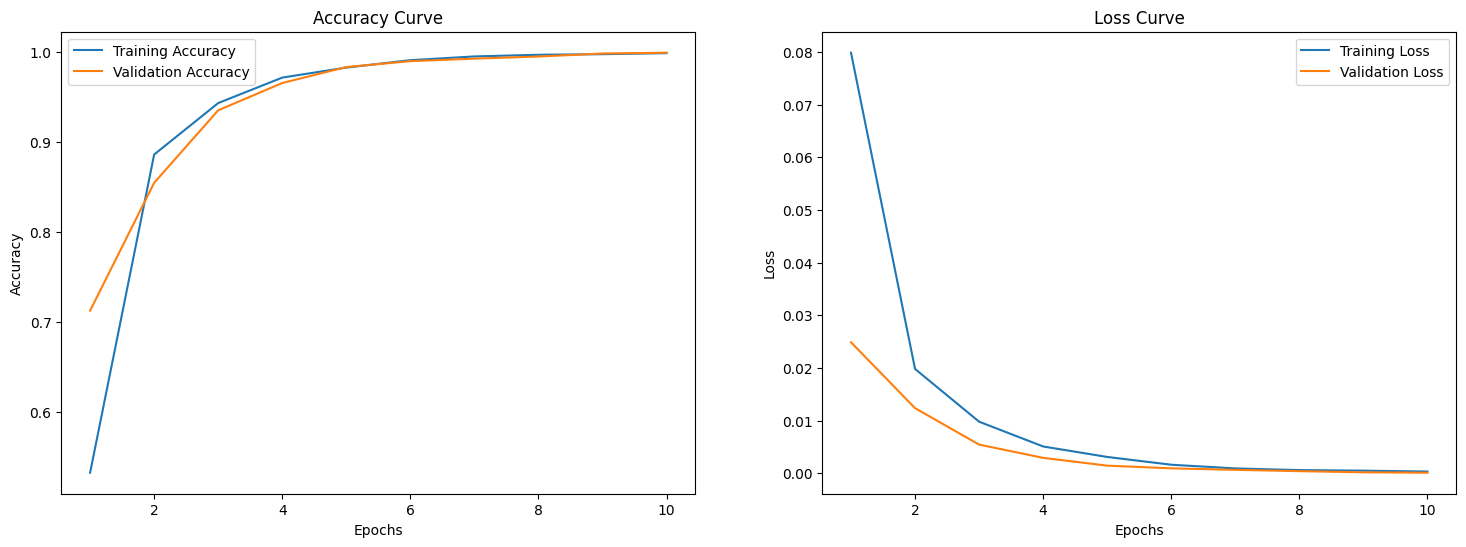

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 6))

plt.subplot(1, 2, 1)
plt.title('Accuracy Curve')
plt.plot(epochs, train_acc, label = 'Training Accuracy')
plt.plot(epochs, vaild_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Loss Curve')
plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, valid_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [51]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


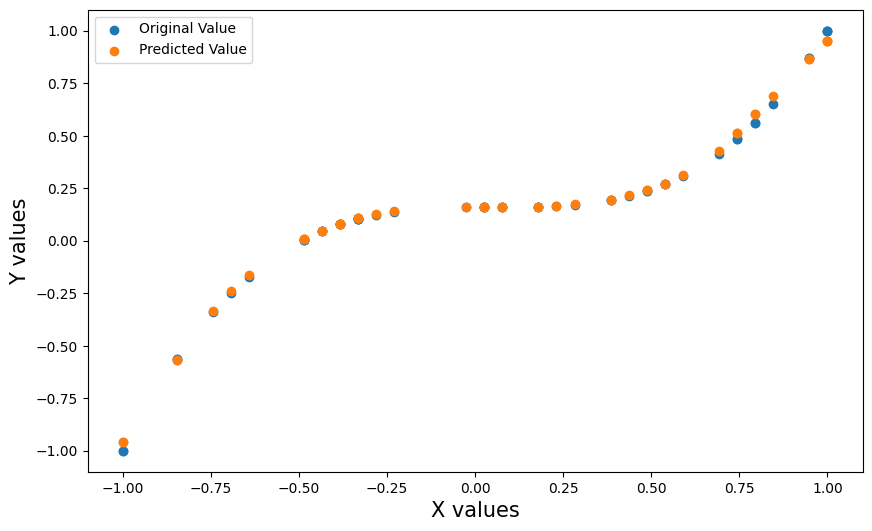

In [58]:
plt.figure(figsize = (10, 6))
plt.scatter(x_test, y_test, label = 'Original Value')
plt.scatter(x_test, y_pred, label = 'Predicted Value')
plt.xlabel('X values', fontsize = 15)
plt.ylabel('Y values', fontsize = 15)
plt.legend()

plt.show()
